<a href="https://colab.research.google.com/github/adolfoguimaraes/datascience/blob/main/01_laboratorio_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratório de Análise de Dados

Esse laboratório tem como objetivo fazer a caracterização de cada atributo das bases sugeridas, mostrando tipos e escala correspondentes. Em seguida faça uma análise exploratória dos atributos. Inicie com um análise de dados univaridos e em seguida utilize métricas para os dados multivariados. Para cada análise vamos escrever uma conclusão sobre as tarefas realizadas. 

Esse notebook é dividido em 3 partes: 

1. Na primeira parte será mostrado alguns conceitos básicos e métodos para gerar algumas visualizações utilizando as bibliotecas propostas. Para isso, vamos utilizar a base de dados da Iris. Nosso objetivo nessa primeira parte é forcar mais em conhecer a ferramenta do que na análise em si. 

2. Já na segunda parte, vamos aplicar análise completa a base do Titanic. Vamos usar métodos do pandas e mecanismos da visualização para enxergar melhor o conjunto de dados apresentados. 

3. Na terceira parte, vamos usar uma base real para análise. Nessa parte vocês devem fazer sozinhos e baseados no que foi apresentado fazer a própria análise de vocês. 


![lets_go](https://media.giphy.com/media/3o7TKUM3IgJBX2as9O/giphy.gif?cid=ecf05e47mtninky8spwobfnp5rt74b7zr4vr5k4cckab9ujz&rid=giphy.gif&ct=g)

In [1]:
# Importação de pacotes necessários para este laboratório

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


## Base de Dados da Iris

Vamos começar com uma tradicional base para estudo em Machine Learning. O dataset [Iris](https://archive.ics.uci.edu/ml/datasets/iris). Esse dataset é bastante utilizado por quem está começando a trabalhar com análise de dados. 

In [10]:
data_iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
data_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
# Importando os dados da Iris em um dataframe
'''
data_iris = sns.load_dataset('iris')
data_iris
'''

"\ndata_iris = sns.load_dataset('iris')\ndata_iris\n"

O primeiro passo é classificar o tipo de cada atributo. Todos os atributos são quantitativos contínuos representados por números reais. Segundo a descrição da base, eles se referem as medidas de característica de plantas: tamanho das sépalas e pétalas.

A coluna **species** corresponde ao label de cada instância. Cada entrada da base é classificada em uma espécie que pode assumir 3 valores.

Podemos ver a distribuição de cada classe com o código a seguir: 

In [17]:
values = data_iris['species'].value_counts().to_frame()
values

,species
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Um outro método interessante do pandas é o _describe_. Ele permite exibir uma série de informações de uma vez só sobre os atributos.

In [20]:
data_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Com esse método podemos extrair informações sobre média, desvio padrão e valores do quartil, além do total para cada atributo. O que podemos extrair desses dados? 

* A base é completa. Não existem valores faltando para um ou mais atributos. Observe que cada coluna tem exatamente 150 linhas. 

* Os dados tem pouca variação, quando isso acontece o desvio padrão tende a ser baixo.

Apesar do método _describe_ já trazer um conjunto de informações, podemos extrai-las individualmente.

In [21]:
# intervalo

data_features = data_iris[["sepal_length","sepal_width","petal_length","petal_width"]]
data_features.max() - data_features.min()

sepal_length    3.6
sepal_width     2.4
petal_length    5.9
petal_width     2.4
dtype: float64

In [23]:
# variancia

data_iris[["sepal_length","sepal_width","petal_length","petal_width"]].var()

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

In [25]:
# desvio padrão

data_iris[["sepal_length","sepal_width","petal_length","petal_width"]].std()

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

Analisando somente os números fica difícil ver se tem algum _outlier_ já que os valores estão muito próximos. Podemos enxergar melhor essas informações se plotarmos o boxplot de cada atributo. O pandas também tem métodos para isso.

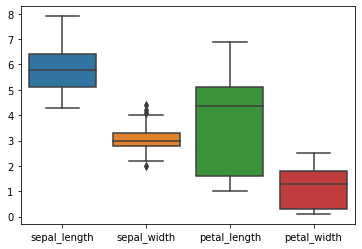

In [39]:
sns.boxplot(data=data_iris)

Podemos olhar para os atributos de acordo com a espécie:

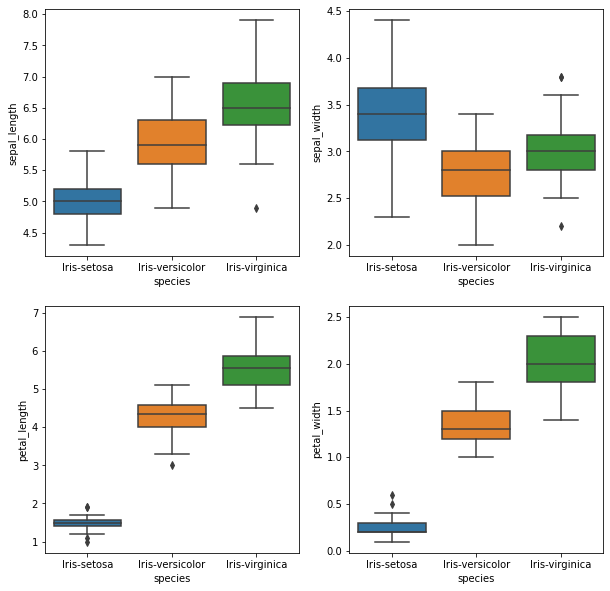

In [42]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
sns.boxplot(data=data_iris, x="species", y="sepal_length", ax=axs[0][0])
sns.boxplot(data=data_iris, x="species", y="sepal_width", ax=axs[0][1])
sns.boxplot(data=data_iris, x="species", y="petal_length", ax=axs[1][0])
sns.boxplot(data=data_iris, x="species", y="petal_width", ax=axs[1][1])

A outra análise que podemos fazer é em relação aos dados multivariados. A informação que mais interessa por enquanto é a relação de correlação. Vamos exibir a matriz de correlação e o gráfico _scatter plot_ dos atributos.

In [43]:
# Tabela de Correlação

corr_table = data_iris.corr()
corr_table

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Podemos visualizar isso melhor com o um Heatmap.

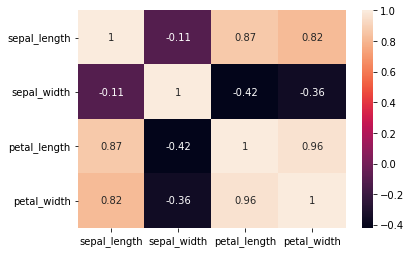

In [44]:
# Heatmap

sns.heatmap(corr_table, xticklabels=corr_table.columns, yticklabels=corr_table.columns, annot=True)

Outra forma de enxergar com os dados se comportam é a partir de um `Scatter Plot` que permite ver a distribuição dos dados.

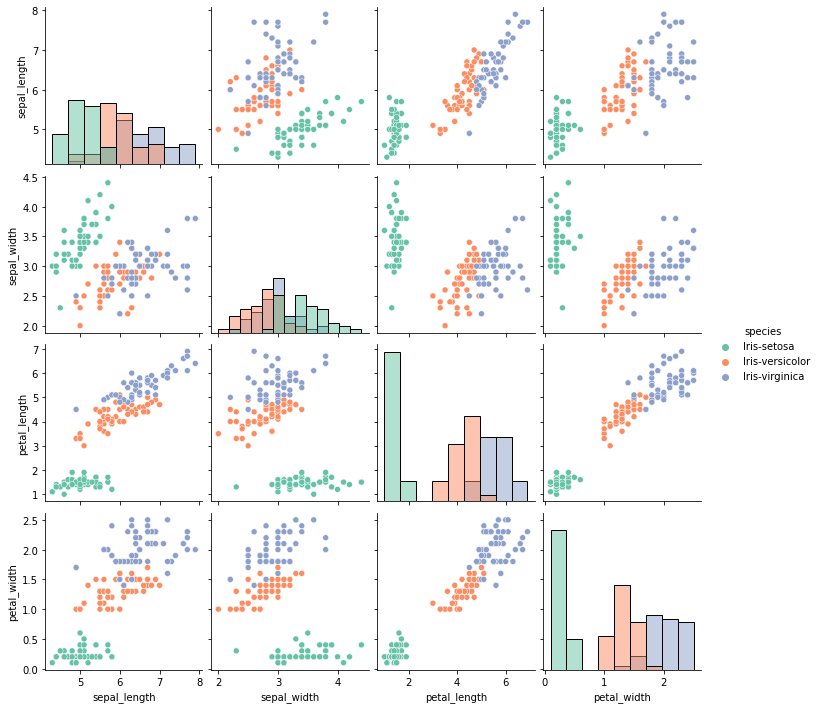

In [45]:
# Scatter Plot

sns.pairplot(data_iris, kind="scatter", hue="species", markers=["o", "o","o"], palette="Set2",diag_kind="hist")
plt.show()

Vamos analisar duas correlações para reforçar o significado desses valores. Primeiro vamos comentar sobre uma correlação positiva, no caso a correlação entre *petal_length* e *petal_width* com coeficiente de correlação igual a 0.96 e a correlação entre *sepal_width*  e *petal_length* que possuem um coeficiente negativo de de -0.43. Se plotarmos somente o gráfico do primeiro caso temos:

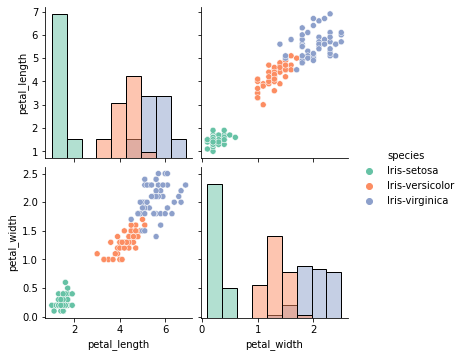

In [46]:
sns.pairplot(data_iris[['petal_length','petal_width','species']], kind="scatter", hue="species", markers=["o", "o","o"], palette="Set2",diag_kind="hist")
plt.show()

Observe que claramente existe uma relação linear positva entre os dois atributos. É fácil traçar uma reta que consiga casar com estes dados (ou com boa parte deles) e o comportamento da reta indica que o aumento de um influencia no aumento do outro. 

No entanto, se analisarmos o caso negativo, temos: 

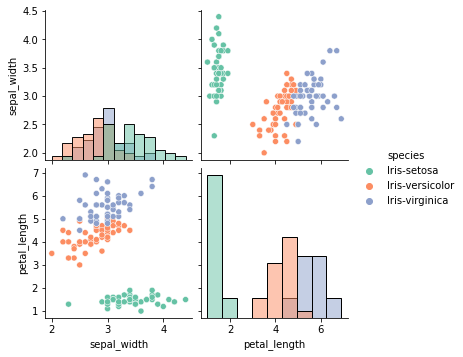

In [47]:
sns.pairplot(data_iris[['sepal_width','petal_length','species']], kind="scatter", hue="species", markers=["o", "o","o"], palette="Set2",diag_kind="hist")
plt.show()

Já neste caso, a relação é negativa. Ou seja, o aumento de um implica na redução de outro. Observe que é bem influenciado por conta dos dados marcados de verde (classe _setosa_).

## Base da Dados do Titanic

Agora é sua vez de praticar alguns conceitos vistos em sala de aula. 

![yesss](https://media.giphy.com/media/ckeHl52mNtoq87veET/giphy.gif?cid=ecf05e47qtez4c3nt0lkzon700f6vsoxdfi73s0t0pf3keys&rid=giphy.gif&ct=g)

Vamos trabalhar com a base de dados de sobreviventes do Titanic. Acesse o endereço https://www.kaggle.com/c/titanic/ e baixe o dataset train.csv e faça o upload no notebook. Para baixar o arquivo você precisa fazer um cadastro no site do Kaggle. Para fazer o upload, basta clicar no ícone de pasta na barra lateral daqui do notebook e fazer o upload do arquivo. 

A imagem a seguir mostra onde clicar para fazer o download do arquivo. 

![Image](https://www.data2learning.com/machinelearning/images_notebook/titanic_kaggle.png)

Um passo importante antes de trabalhar com qualquer base é identificar o que significa cada coluna da base. Essas informações devem ser adquiridas por quem forneceu a base de dados ou o especialista da área que se está trabalhando. Neste caso, as informações foram retiradas do próprio site do Kaggle.

| Atributo | Definição | Chave dos valores |
|:--------|:--------:|:--------:|
| Survived | Se sobreviveu ou não ao titanic | 0 = Não e 1 = Sim |
| Pclass | Classe do ticket | 1 = primeira, 2 = segunda e 3 = terceira |
| Sex | Sexo do passageiro | |
| Age | Idade em anos | |
| SibSp | Número de irmãos / cônjuges a bordo | |
| Parch | Número de pais / filhos a bordo | |
| Ticket | Número do ticket | | 
| Fare | Valor da passagem | | 
| Cabin | Número da cabine | |
| Embarked | Portão de embarque | C = Cherboug, Q - Queenstown, S = Southampton | 

Vamos carregar a base em um DataFrame para começar os trabalhos.


In [48]:
# Carregand o a base de dados
titanic_dataset = pd.read_csv("train.csv")
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Vamos fazer as seguintes tarefas: 

1. Classificar cada um dos atributos em relação à tipo e escala vistos em sala de aula.
2. Calcular as métricas de localidade e correlação vistas em sala de aula. Observe o tipo de atributo para cálculo da métrica correta.
3. Na aula, foi mostrado como calcular a correlação entre atributos que são quantitativos. E no caso dos qualitativos, como seria? Pesquise e proponha para os atributos quantitativos da base.

O objetivo do trabalho é fazer com que vocês comecem a mexer com base de dados aqui no nosso ambiente de trabalho.

O primeiro passo é ver a quantidade de atribuitos e instâncias da base de dados. Isso pode ser facilmente descoberto com o método `shape`. 

In [49]:
titanic_dataset.shape

(891, 12)

Isso indica que a base possui 891 instâncias e 12 atributos. Destes atributos, um é considerado classe: `Survived`. O conceito dessa classe vai ficar mais claro nos próximos assuntos. Por enquanto, saiba que ela é nossa variável de referência. Em outras palavras, eu também quero entender como os atributos se comportam de acordo com os valore dessa variável. Isso vai ficar mais claro ao longo da explicação. 

**Analise a tabela e determine o tipo de cada atributo.**



Os atributos podem ser analisados da seguinte maneira: 

| Variável | Tipo | Escala | 
|:------|:------:|:------:|
|PassengerId | Qualitativo | Nominal |
|Survived | Qualitativo | Nominal |
|Pclass | Qualitativo | Ordinal |
|Name | Qualitativo | Nominal |
|Sex | Qualitativo | Nominal |
|Age | Quantitativo Discreto | Racional |
|SibSp | Quantitativo Discreto | Racional |
|Parch | Quantitativo Discreto | Racional |
|Ticket| Qualitativo | Nominal | 
|Fare | Quantitativo Contínuo | Racional |
|Cabin | Qualitativo | Nominal |
|Embarked | Qualitativo | Nominal |



Agora que já sabemos como cada atributo é classificado podemos expandir nossa análise de acordo com o tipo do atribuito. Vamos primeiro trabalhar com os atributos quantitativos, extraindo informações gerais como média, desvio padrão e quartil. Depois vamos analisar a partir de gráficos como estão distribuídos os atributos qualitativos. 

### Análise Quantitativa

Uma forma simples de var as principais métricas dos atributos quantitativos é utilizar o método `describe`. 

In [54]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observer que ele gera estatística para todos os campos numéricos da base. Mas sabemos que mesmo que alguns campos sejam representados por números, eles não são quantitativos e sim qualitativos. Por exemplo, no caso do atributo `Survived` não faz sentido calcularmos a média, desvio padrão, percentil, porque é um atributo qualitativo. Vamos melhorar isso. 

In [61]:
# Descobrindo o tipo dos atributos
titanic_dataset.dtypes

PassengerId    category
Survived       category
Pclass         category
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [62]:
# Convertendo os atributos para categórico
titanic_dataset[['PassengerId','Survived','Pclass','Name','Sex','Ticket','Cabin','Embarked']] = titanic_dataset[['PassengerId','Survived','Pclass','Name','Sex','Ticket','Cabin','Embarked']].astype("category")
titanic_dataset.dtypes

PassengerId    category
Survived       category
Pclass         category
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

Agora, se chamarmos o método `describe`, apenas o atributos numéricos vão aparecer.

In [63]:
titanic_dataset.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


**O que podemos falar desses valores?**

Uma primeira informação que temos é que nem todas as instâncias tem a informação de idade (linha *count*). Isso pode ser um problema quando for trabalhar com modelos de classificação. É papel do analista de dados decidir o que fazer com essas instâncias. 

Podemos perceber que muitos dados não possuem informações a respeito de parentes (atributos SibSp e Parch). Isso não significa que tenha um erro nos dados e sim que de fato tinham poucos parentes. Podemos perceber isso pelos valores de quartil. Veja que basicamente os valores associados a estes atributos estão nos 75%. 

Em relação ao desvio padrão vale a pena obersevar seu valor alto no campo de preço da passagem. Apesar da média ser 32, existe o valor máximo de 512. Isso pode ser um _outlier_ é importante analisar com mais atenção. Existe valores nulos para passagem também. Interessante analisar se também é um ruído ou de fato existiram pessoas que não pagaram passagem. 

Vamos plotar os boxplots destes atributos para analisar melhor. Como a escala de valores é muito diferente, os gráficos serão plotados de forma separada.

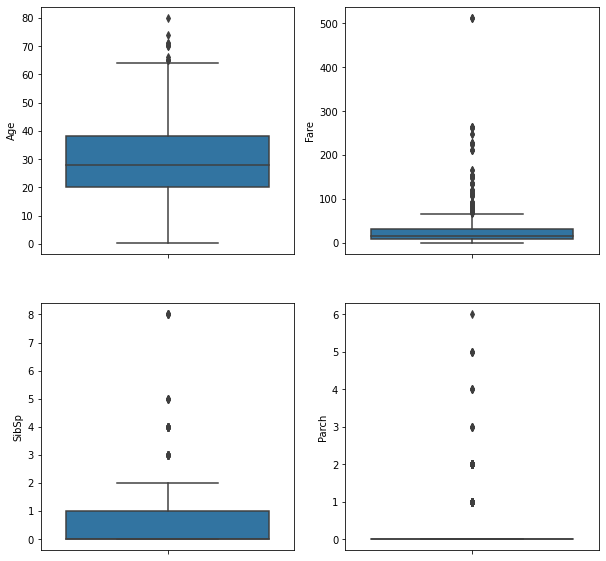

In [68]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
sns.boxplot(data=titanic_dataset, y="Age", ax=axs[0][0])
sns.boxplot(data=titanic_dataset, y="Fare", ax=axs[0][1])
sns.boxplot(data=titanic_dataset, y="SibSp", ax=axs[1][0])
sns.boxplot(data=titanic_dataset, y="Parch", ax=axs[1][1])

As análise feitas anteriormente ficam mais evidentes com a apresentação dos boxsplot. Cabe ao cientista de dados analisar o que se deve fazer com esses ruídos.

Para finalizar a análise atributos quantitativos do Titanic, vamos explorar a correlação entre os dados quantitativos. 

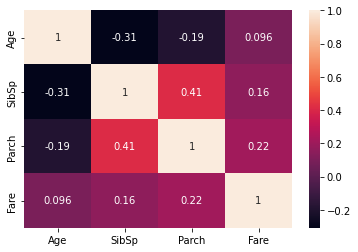

In [71]:
titanic_corr = titanic_dataset[['Age','SibSp','Parch', 'Fare']].corr()
sns.heatmap(titanic_corr, xticklabels=titanic_corr.columns, yticklabels=titanic_corr.columns, annot=True)

Podemos enxergar por meio do Scatter Plot também.

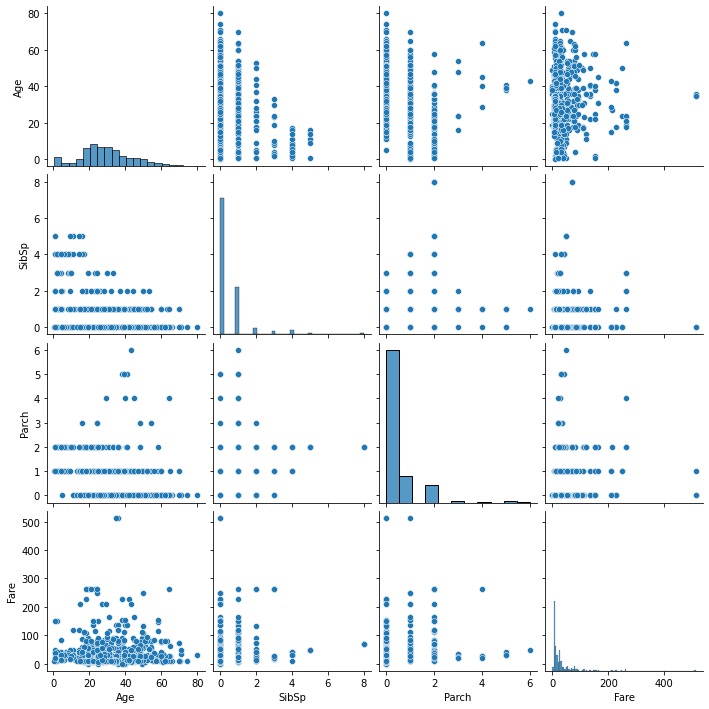

In [72]:
sns.pairplot(titanic_dataset[['Age','SibSp','Parch', 'Fare']], kind="scatter",markers=["o"], palette="Set2",diag_kind="hist")
plt.show()

É fácil perceber que não existem muitas correlações lineares entre os atributos numéricos. A maioria das correlações são próximas de zero com algumas tendências positivas ou negativas.

Vamos relacionar algumas outros atributos que pode nos dar informações mais interessantes.

Vamos trabalhar melhor essas correlações mais a frente. 

### Análise Qualitativa

Veja que podemos extrair muitas informações apenas com medidas estatísticas a respeito dos dados quantitativos.

De forma semelhante, podemos analisar os dados qualitativos. Para visualizar a distribuição de valores, vamos utilizar gráficos de barra. Ao longo do curso, serão exploradas outras formas de visualização dos dados.

Vamos trabalhar com os seguintes dados qualitativos: Survived, Pclass, Sex e Embarked.  

Primeiro vamos ver se eles estão completos. Ou seja, se todas as instâncias têm as informações para todos esses atributos. 

In [69]:
titanic_dataset[['Survived', 'Pclass', 'Sex', 'Embarked']].count()

Survived    891
Pclass      891
Sex         891
Embarked    889
dtype: int64

Observe que apenas duas instâncias casos não possuem a infomação do portão de embarque. Os demais dados possuem informação completa. 

Um jeito simples de entender os dados dos atributos qualitativos é plotar um gráfico de barras para cada um dos atributos. 

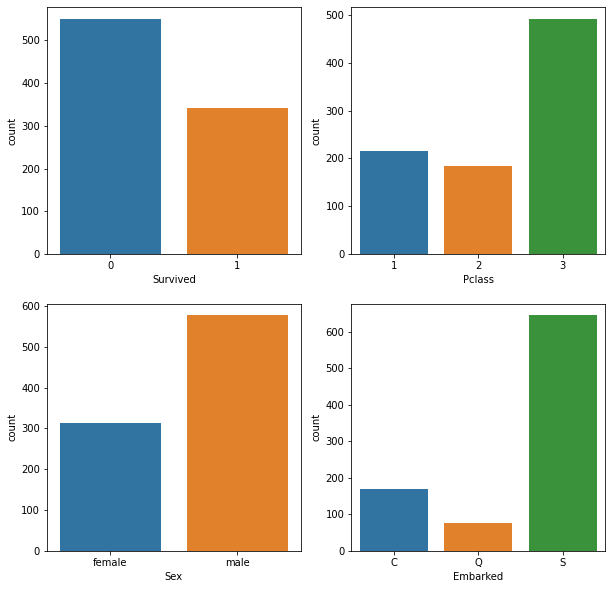

In [70]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
sns.countplot(x="Survived",data=titanic_dataset,ax=axs[0][0])
sns.countplot(x="Pclass",data=titanic_dataset,ax=axs[0][1])
sns.countplot(x="Sex",data=titanic_dataset,ax=axs[1][0])
sns.countplot(x="Embarked",data=titanic_dataset,ax=axs[1][1])

**O que podemos analisar desses gráficos?**

* É fácil ver que existem mais pessoas que não sobreviveram ao Titanic. Se essa for nossa variável de classificação em um modelo de Machine Learning, isso deve ser analisado para saber se essa diferença terá implicâncias no modelo de classificação. 
* As outras classes a gente observa que existe um predominância de alguns valores. Tem mais pessoas da terceira classe, mais homens e mais pessoas que embarcaram no portão S. 

Vamos olhar melhor esses dados qualitativos fazendo algumas correlações entre os atributos qualitativos. Uma forma simples de ver essa correlações é por meio de gráfico de barra, onde conseguimos relacionar as duas variáveis qualitativas. Um pouco de como relacionar estes dois tipos de variáveis pode ser visto [neste vídeo](https://www.youtube.com/watch?v=7zzQAPuATK8)

Uma relação que podemos analisar é Sobreviventes com Classe. 

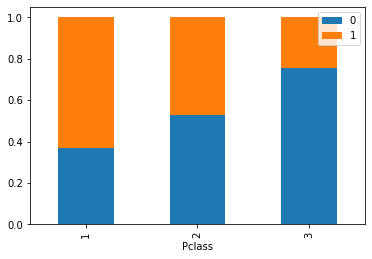

In [73]:
props = titanic_dataset.groupby("Pclass")['Survived'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True')

**O que esse gráfico nos conta?**

É fácil perceber que os passageiros que estavam na terceira classe foram os que tiveram maior número de vítimas. Uma justificativa para isso pode ter sido os privilégios dos passageiros das classes superiores. No entanto, qualquer análise mais profunda de causalidade deve ser analisada com certa ponderação e com outras fontes de informações. 

Vamos ver como se comporta se relacionarmos o sexo com o fato de ter sobrevivido ou não.

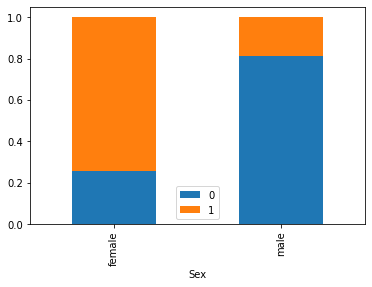

In [74]:
props = titanic_dataset.groupby("Sex")['Survived'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True')

**O que esse gráfico nos conta?**

De fato, as mulheres tinham preferência sobre o uso dos botes salva-vidas. Logo, o número de sobreviventes mulheres é maior que os de homem. 

Outra coisa que pode ser relacionada é o fato do passageiro ter parentes ou não. É sabido que passageiros com crianças tinham preferência. Para fazer essa analise, vamos criar um campo qualitativo que indica se o passageiro tinha algum tipo de parente. 

In [111]:
cond_ = (titanic_dataset['SibSp'] + titanic_dataset['Parch']) > 0
titanic_dataset['HasRelatives'] = cond_
titanic_dataset['Survived'] = titanic_dataset['Survived'].astype("bool")

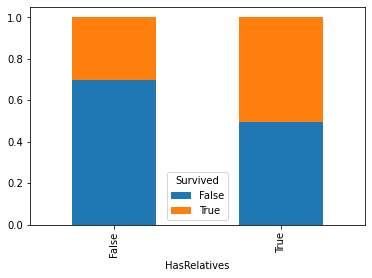

In [112]:
props = titanic_dataset.groupby("HasRelatives")['Survived'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True')

**O que esse gráfico nos conta?**

De fato, a porcentagem de sobreviventes é maior naquele grupo que tinha parentes. Talvez uma análise interessante de se fazer é relacionar esses dois fatores com o fato dos passageiros serem da primeira, segunda ou terceira classe. 

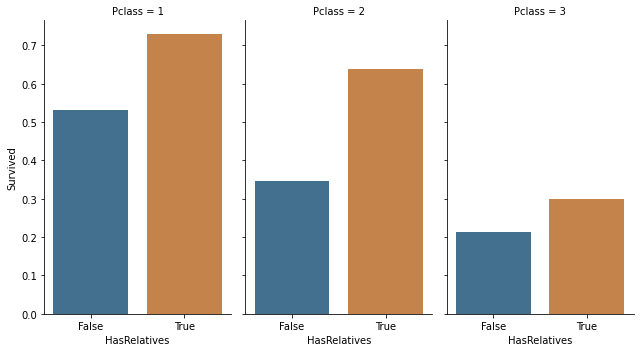

In [114]:
g = sns.catplot(x="HasRelatives", y="Survived", col="Pclass",
                data=titanic_dataset, saturation=.5,
                kind="bar", ci=None, aspect=.6)

Veja que mesmo tendo parentes, a taxa de sobreviventes na terceira classe variou pouco (de 20% para 30%). Já na primeira classe, esse valor passou de 50% para um pouco mais de 70%.

### Análise Qualitativa x Quantitativa

Outra relação interessantes para extrair deste conjunto de dados é a relação Idade/Sobrevivente. Neste caso, estamos relacionando um atributo quantitativo com um atributo qualitativo. As métricas e modelos utilizados até então foram de atributos do mesmo tipo. Uma explicação dessa abordagem pode ser encontrada [neste vídeo](https://www.youtube.com/watch?v=qMVALuutgU0).

A relação de idade e sobrevivente pode ser analisada a partir de um boxplot que relacione a variável qualitativa com a quantitativa.


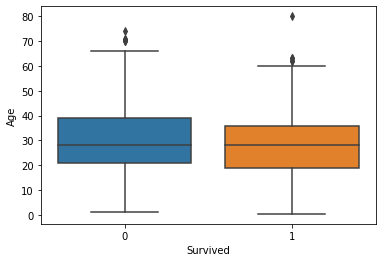

In [102]:
ax = sns.boxplot(x="Survived", y="Age", data=titanic_dataset)

**O que podemos analisar desse gráfico?**

Obseve no gráfico a seguir que a faixa etária de pessoas que sobreviveram e as que não sobreviveram são bem parecidas. A mediana em ambos os casos é quase a mesma. Sendo assim, não existe uma relação entre a idade e o fato de ter sobrevivido. 

Vamos olhar a relação também a relação entre a classe e o valor pago pela passagem. 

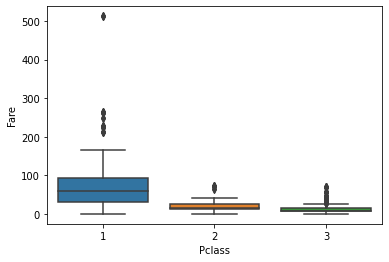

In [103]:
ax = sns.boxplot(x="Pclass", y="Fare", data=titanic_dataset)

**O que podemos analisar desse gráfico?**

Esse gráfico ajuda a ver que o valor alto pago pela passagem está relacionado com passageiros da primeira classe. Isso pode mostrar que de fato o valor faz sentido e corresponde a alguma cabine que tem um valor alto.

## Análise de Popularidade de Notícias

Um empresa coletou uma série de informações sobre artigos publicados em seu site. Para cada artigo foi coletada uma série de métricas interessantes. Analise as métricas a seguir e construa visualizações que facilitam essa análise. Escolha um conjunto de atributos que, no seu ponto de vista, seria importante para analisar. 

Informações originais sobre o dataset estõa disponíveis no paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal. Disponível em: https://link.springer.com/chapter/10.1007/978-3-319-23485-4_53. 

O dataset pode ser baixado no site: https://archive.ics.uci.edu/ml/datasets/online+news+popularity ou acessado na pasta `datasets` deste repositório. 

A base possui os seguintes atributos:

     0. url:                           URL of the article
     1. timedelta:                     Days between the article publication and
                                       the dataset acquisition
     2. n_tokens_title:                Number of words in the title
     3. n_tokens_content:              Number of words in the content
     4. n_unique_tokens:               Rate of unique words in the content
     5. n_non_stop_words:              Rate of non-stop words in the content
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the
                                       content
     7. num_hrefs:                     Number of links
     8. num_self_hrefs:                Number of links to other articles
                                       published by Mashable
     9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos
    11. average_token_length:          Average length of the words in the
                                       content
    12. num_keywords:                  Number of keywords in the metadata
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)
    28. self_reference_min_shares:     Min. shares of referenced articles in
                                       Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in
                                       Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in
                                       Mashable
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4
    44. global_subjectivity:           Text subjectivity
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content
    47. global_rate_negative_words:    Rate of negative words in the content
    48. rate_positive_words:           Rate of positive words among non-neutral
                                       tokens
    49. rate_negative_words:           Rate of negative words among non-neutral
                                       tokens
    50. avg_positive_polarity:         Avg. polarity of positive words
    51. min_positive_polarity:         Min. polarity of positive words
    52. max_positive_polarity:         Max. polarity of positive words
    53. avg_negative_polarity:         Avg. polarity of negative  words
    54. min_negative_polarity:         Min. polarity of negative  words
    55. max_negative_polarity:         Max. polarity of negative  words
    56. title_subjectivity:            Title subjectivity
    57. title_sentiment_polarity:      Title polarity
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level
    60. shares:                        Number of shares (target)


Você como analista de dados teve acesso a essas informações e foi contratado para fazer uma análise desses dados.

Vamos seguir os seguinte roteiro:

Com a base carregada, faça as seguintes tarefas: 

1. Selecionar nossos atributos de interesse;
1. Classificar cada um dos atributos em relação à tipo e escala vistos em sala de aula.
2. Calcular as métricas de localidade e correlação vistas em sala de aula. Observe o tipo de atributo para cálculo da métrica correta.
3. Faazer uma análise das visualizações encontradas.

Vamos começar.

Vamos carregar a base a partir do arquivo `base_popularity.csv`. Ele está disponível na pasta `dataset` do repositório ou diretamente no link: 

In [150]:
data_popularity = pd.read_csv("../datasets/OnlineNewsPopularity.csv")
data_popularity.columns = [column.strip() for column in data_popularity.columns] # corrige o problema de ter espaço nos nomes das colunas 
data_popularity

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


### Tarefa 1 

Vamos selecionar os nossos atributos de interesse. Eu selecionei os seguintes: 

In [151]:
selected_columns = [
    'n_tokens_title','n_tokens_content','num_hrefs',  'num_imgs', 'num_videos', 
    'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed',
    'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 
    'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
    'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 
    'title_sentiment_polarity', 'rate_positive_words', 'rate_negative_words', 'shares'
]

data_popularity_selected = data_popularity[selected_columns]
data_popularity_selected

,n_tokens_title,n_tokens_content,num_hrefs,num_imgs,num_videos,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,...,weekday_is_saturday,weekday_is_sunday,is_weekend,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_sentiment_polarity,rate_positive_words,rate_negative_words,shares
0,12.0,219.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.092562,0.045662,0.013699,-0.187500,0.769231,0.230769,593
1,9.0,255.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.148948,0.043137,0.015686,0.000000,0.733333,0.266667,711
2,9.0,211.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.323333,0.056872,0.009479,0.000000,0.857143,0.142857,1500
3,9.0,531.0,9.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.100705,0.041431,0.020716,0.000000,0.666667,0.333333,1200
4,13.0,1072.0,19.0,20.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.281003,0.074627,0.012127,0.136364,0.860215,0.139785,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.141964,0.037572,0.014451,0.000000,0.722222,0.277778,1800
39640,12.0,328.0,9.0,3.0,48.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.194249,0.039634,0.009146,1.000000,0.812500,0.187500,1900
39641,10.0,442.0,24.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.024609,0.033937,0.024887,0.136364,0.576923,0.423077,1900
39642,6.0,682.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.008066,0.020528,0.023460,0.000000,0.466667,0.533333,1100


Antes de começar a analisar os dados, vamos fazer uma pequena alteração. As informações sobre o `channel` e o `weekday` estão distribuídas em diferentes colunas. Apesar desse ser formato correto para usar em modelos de machine learning, esse formato dificulta um pouco a visualização dos dados. Vamos transformar essas colunas em uma única coluna com a informação desejada. 

In [152]:
# Colunas com informações de Channel 

melt_columns_channel = [
    'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed',
    'data_channel_is_tech', 'data_channel_is_world'
]

# Demais colunas do dataset

all_columns_channel = [column for column in data_popularity_selected.columns if column not in melt_columns_channel]

# Transformação da base de dados 

data_final = pd.melt(data_popularity_selected, id_vars=all_columns_channel, value_vars=melt_columns_channel, var_name='channel', value_name='channel_value')
data_final = data_final[data_final['channel_value'] != 0]
data_final['channel'] =data_final['channel'].str.split("_").str[-1]
data_final.drop(columns=['channel_value'], inplace=True)
data_final.reset_index(inplace=True)
data_final



,index,n_tokens_title,n_tokens_content,num_hrefs,num_imgs,num_videos,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,...,weekday_is_sunday,is_weekend,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_sentiment_polarity,rate_positive_words,rate_negative_words,shares,channel
0,6,8.0,960.0,21.0,20.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.268303,0.080208,0.016667,0.000000,0.827957,0.172043,556,lifestyle
1,11,10.0,187.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.150000,0.026738,0.010695,0.000000,0.714286,0.285714,1900,lifestyle
2,18,11.0,103.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.118056,0.029126,0.009709,-0.714286,0.750000,0.250000,5700,lifestyle
3,28,10.0,243.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.155603,0.049383,0.020576,0.000000,0.705882,0.294118,462,lifestyle
4,34,8.0,204.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.316986,0.073529,0.004902,0.000000,0.937500,0.062500,3600,lifestyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33505,237850,12.0,491.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.109942,0.048880,0.014257,0.168182,0.774194,0.225806,1500,world
33506,237851,13.0,746.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.078115,0.030831,0.018767,-1.000000,0.621622,0.378378,914,world
33507,237852,15.0,580.0,15.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.188667,0.025862,0.008621,0.500000,0.750000,0.250000,1700,world
33508,237853,9.0,614.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.126641,0.037459,0.017915,0.000000,0.676471,0.323529,1500,world


Observe que o quantitativo de instâncias diinuiu. Isso aconteceu porque alqumas instâncias não tinha informação sobre o `channel`, ou seja, estava zero em todas as colunas. Eu optei por excluir, mas pense em outras formas de tratar essa informação. 

Vamos trabalhar com o `weekday`.

In [153]:
# Colunas com informações do weekday 
melt_columns_weekday = ['weekday_is_monday', 'weekday_is_tuesday', 
    'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday'
]

# Demais colunas do dataset
all_columns_weekday = [column for column in data_final.columns if column not in melt_columns_weekday]


data_final = pd.melt(data_final, id_vars=all_columns_weekday, value_vars=melt_columns_weekday, var_name='weekday', value_name='weekday_value')
data_final = data_final[data_final['weekday_value'] != 0]
data_final['weekday'] =data_final['weekday'].str.split("_").str[-1]
data_final.drop(columns=['weekday_value'], inplace=True)
data_final.reset_index(inplace=True)
data_final



,level_0,index,n_tokens_title,n_tokens_content,num_hrefs,num_imgs,num_videos,is_weekend,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_sentiment_polarity,rate_positive_words,rate_negative_words,shares,channel,weekday
0,0,6,8.0,960.0,21.0,20.0,0.0,0.0,0.268303,0.080208,0.016667,0.000000,0.827957,0.172043,556,lifestyle,monday
1,1,11,10.0,187.0,7.0,1.0,0.0,0.0,0.150000,0.026738,0.010695,0.000000,0.714286,0.285714,1900,lifestyle,monday
2,2,18,11.0,103.0,3.0,1.0,0.0,0.0,0.118056,0.029126,0.009709,-0.714286,0.750000,0.250000,5700,lifestyle,monday
3,3,28,10.0,243.0,1.0,0.0,0.0,0.0,0.155603,0.049383,0.020576,0.000000,0.705882,0.294118,462,lifestyle,monday
4,4,34,8.0,204.0,7.0,1.0,0.0,0.0,0.316986,0.073529,0.004902,0.000000,0.937500,0.062500,3600,lifestyle,monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33505,234514,237724,16.0,0.0,0.0,16.0,1.0,1.0,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,3500,world,sunday
33506,234515,237725,15.0,447.0,9.0,1.0,1.0,1.0,0.020603,0.017897,0.017897,0.000000,0.500000,0.500000,1000,world,sunday
33507,234516,237728,12.0,496.0,51.0,1.0,0.0,1.0,0.220833,0.024194,0.004032,0.100000,0.857143,0.142857,1300,world,sunday
33508,234517,237735,7.0,0.0,0.0,13.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1600,world,sunday


Pronto, a base está pronta para vocês analisarem. 

In [154]:
# Comece sua análise a partir deste ponto. 

## É isso

Com isso encerramos nossa aula de análise de dados. Outros tipos de análise podem aparecer ao longo do curso. 

![force](https://media.giphy.com/media/3o85xAojNshmzlySyc/giphy.gif?cid=ecf05e47x07q84ywa19aus9n1j1owve0mad420ffmpo6vjha&rid=giphy.gif&ct=g)

**Boa atividade e Divirtam-se ;)**